<a href="https://colab.research.google.com/github/henriquemartins1969/Aulas_Data_Science_Alura/blob/main/Aula_1-APLICANDO_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Aula 1: Preparando e processando os dados**

###**Importando os dados**

> Você pode checar a documentação da biblioteca Pandas [aqui](https://pandas.pydata.org/).

In [47]:
import pandas as pd

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [49]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


###**Tratando dados nulos**

In [50]:
df.shape

(17429, 10)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [52]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


>Você pode encontrar informações detalhadas sobre o método *interpolate()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

In [53]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [54]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


###**Identificando e removendo dados duplicados**

In [55]:
df.duplicated().sum()

15

In [56]:
# Identificando as linhas duplicadas no DataFrame
duplicatas = df.duplicated(keep=False)

# Selecionando as linhas duplicadas com base no resultado anterior
linhas_duplicadas = df[duplicatas]

# Ordenando as linhas duplicadas pela coluna 'data_hora'
linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


>Você pode encontrar informações detalhadas sobre o método *drop_duplicates()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html).

In [57]:
df_limpo = df.drop_duplicates()

In [58]:
df_limpo.shape

(17414, 10)

In [59]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

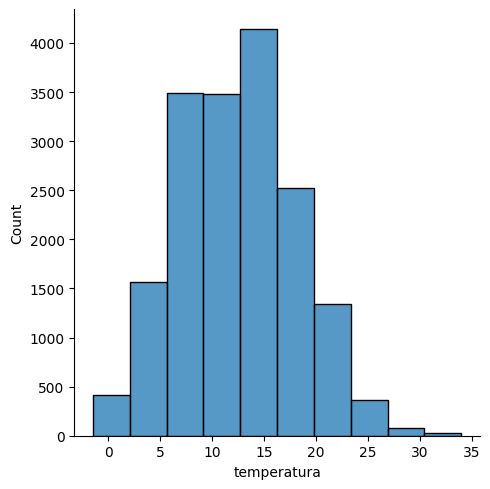

In [61]:
sns.displot(df_limpo, x='temperatura', bins=10)

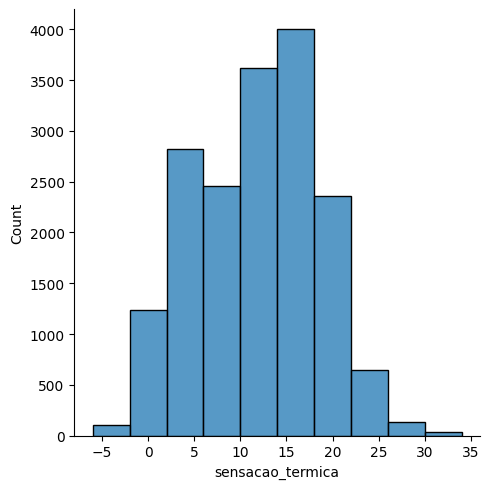

In [62]:
sns.displot(df_limpo, x='sensacao_termica', bins=10)

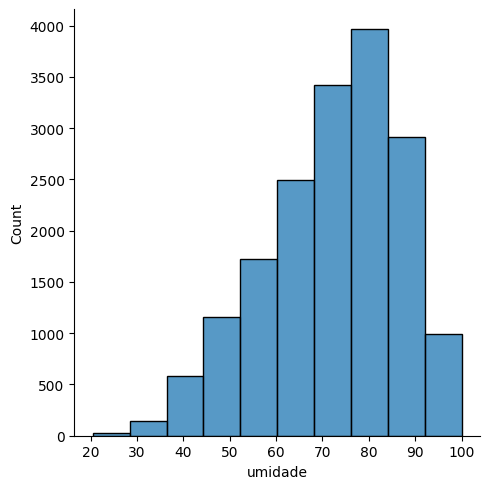

In [63]:
sns.displot(df_limpo, x='umidade', bins=10)

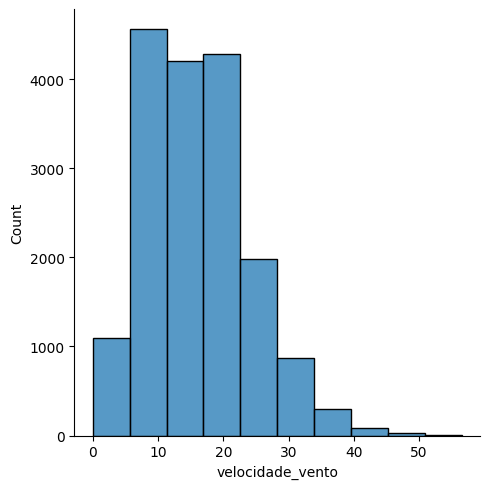

In [64]:
sns.displot(df_limpo, x='velocidade_vento', bins=10)

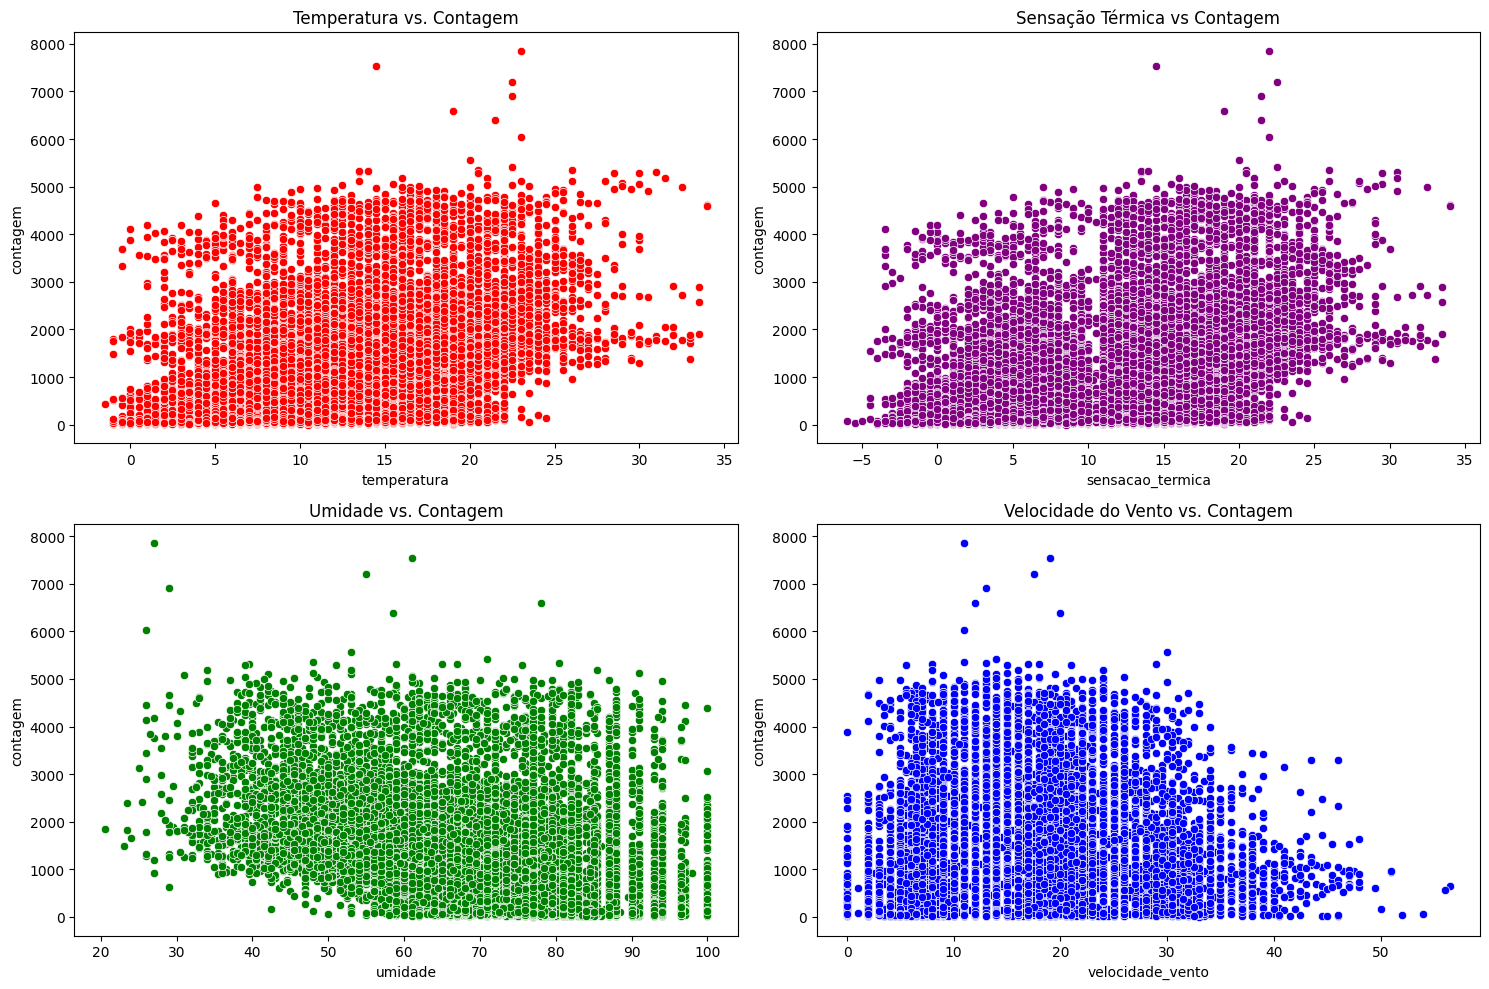

In [65]:
# prompt: crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2x2. Cada gráfico deve ter um título.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Certifique-se de que 'df' esteja definido antes de usá-lo.
# Se 'df' foi definido em uma célula anterior, execute essa célula primeiro.
# Caso contrário, você precisa carregar os dados novamente aqui:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

# Agora você pode usar 'df' para criar 'df_limpo':
df_limpo = df.drop_duplicates()  # Esta linha garante que df_limpo esteja definido

# Criando a figura e os eixos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotando os gráficos de dispersão
sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem', color='red')
axes[0, 0].set_title('Temperatura vs. Contagem')
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem',color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem',color='green')
axes[1, 0].set_title('Umidade vs. Contagem')
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem', color='blue')
axes[1, 1].set_title('Velocidade do Vento vs. Contagem')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo os gráficos
plt.show()

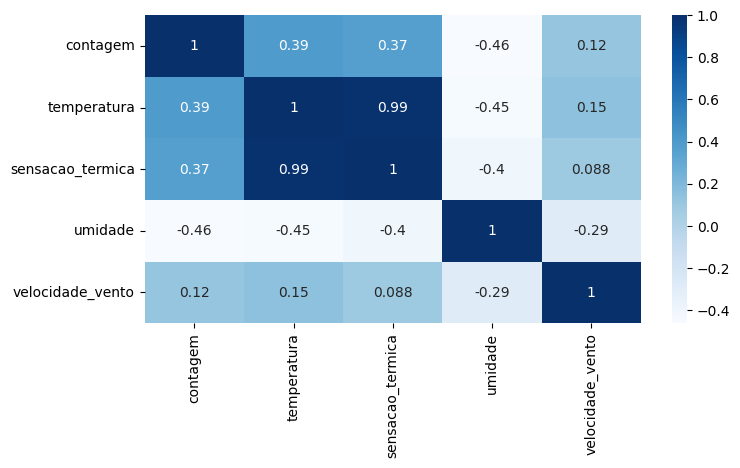

In [66]:
plt.figure(figsize=(8,4))
sns.heatmap(df_limpo.corr(numeric_only=True), cmap='Blues', annot=True)
plt.show()

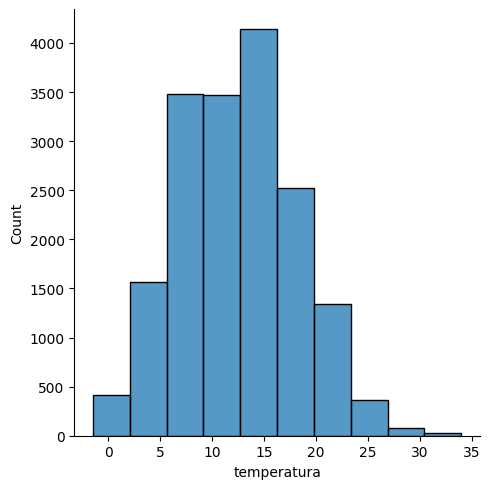

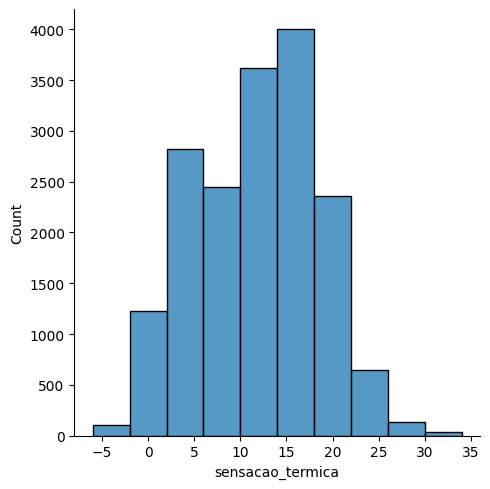

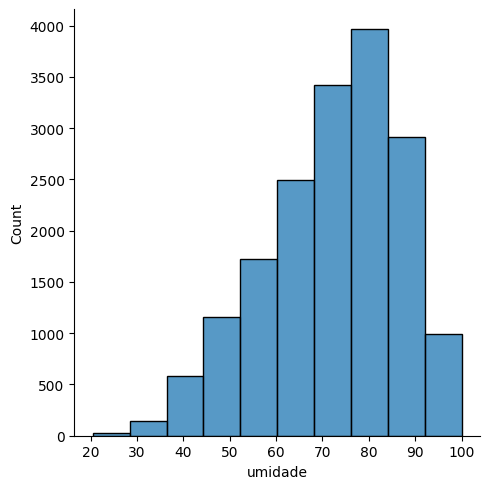

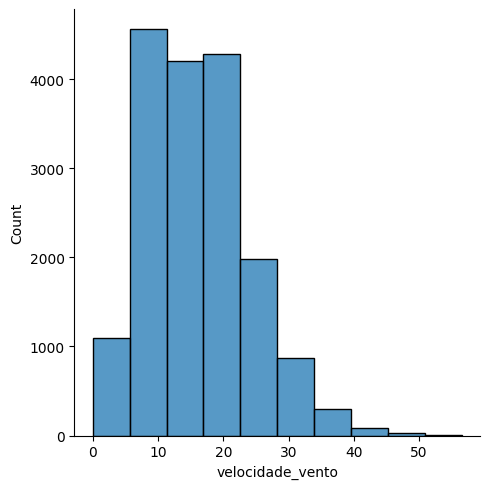

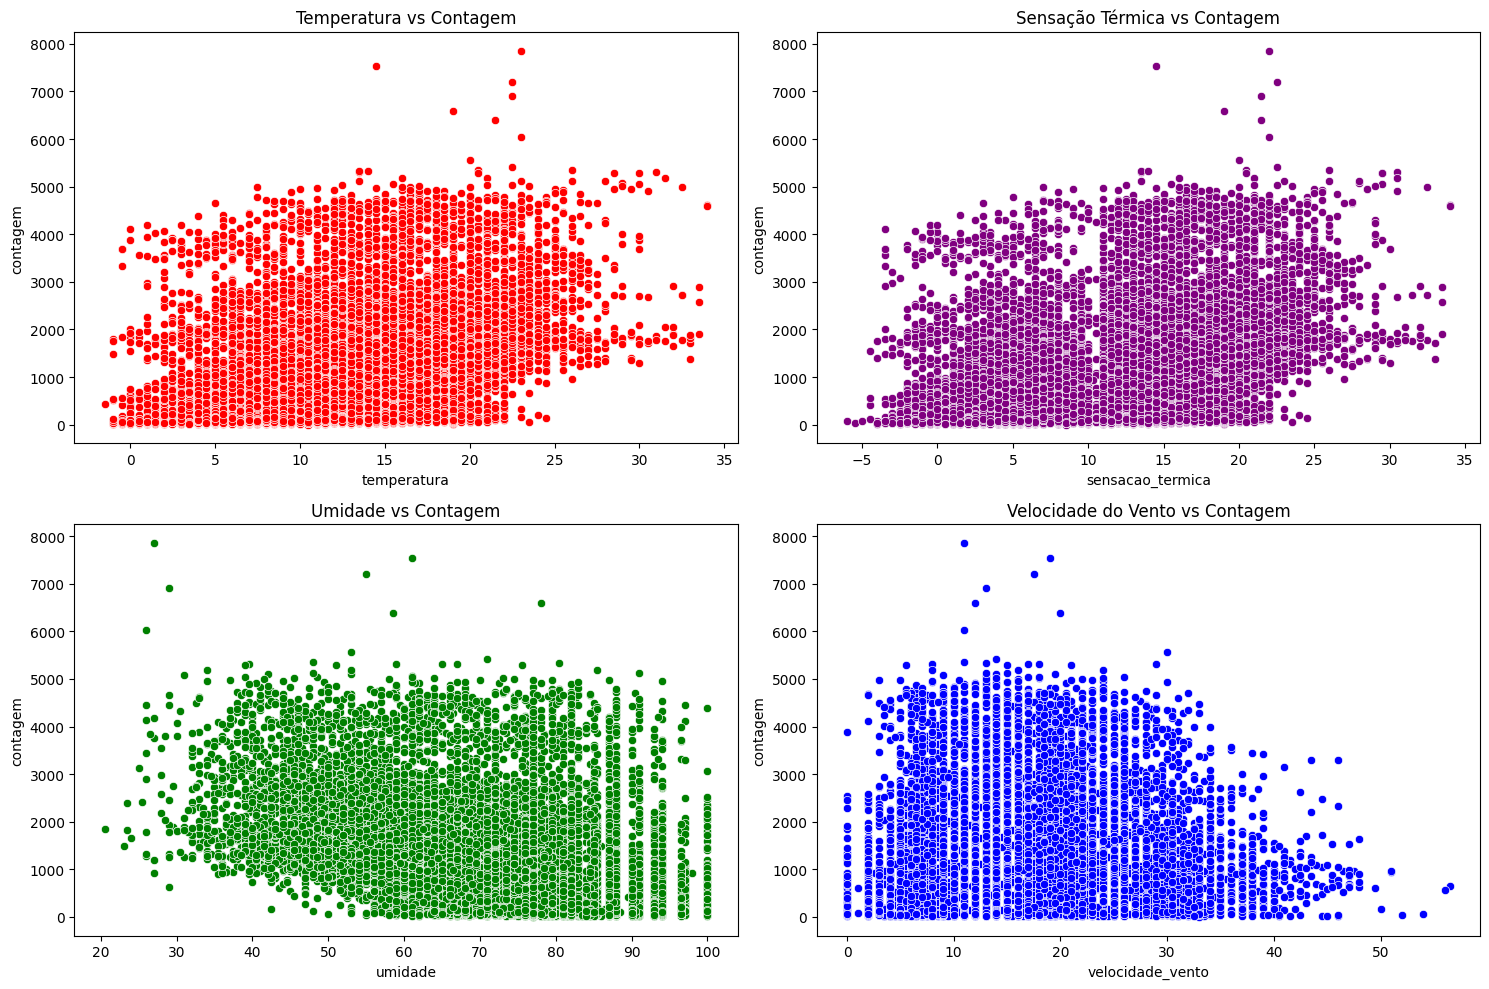

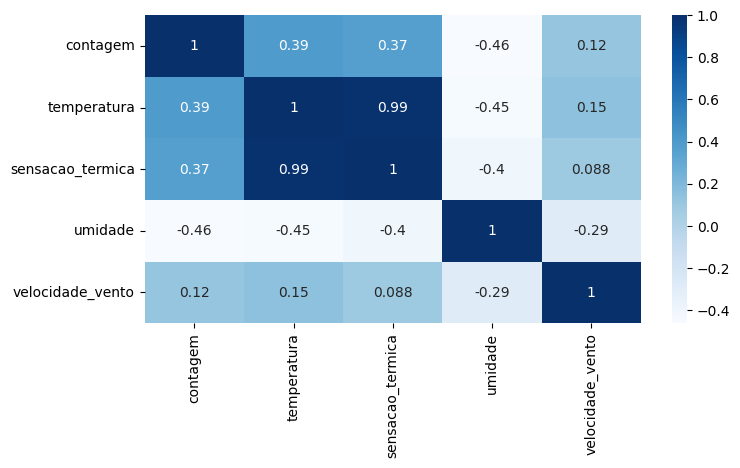

In [67]:
df_limpo.describe()

sns.displot(df_limpo, x='temperatura', bins=10)
plt.show()

sns.displot(df_limpo, x='sensacao_termica', bins=10)
plt.show()

sns.displot(df_limpo, x='umidade', bins=10)
plt.show()

sns.displot(df_limpo, x='velocidade_vento', bins=10)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem', color='red')
axes[0, 0].set_title('Temperatura vs Contagem')
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem', color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem', color='green')
axes[1, 0].set_title('Umidade vs Contagem')
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem', color='blue')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

In [68]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [69]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
    print(f'coluna: {col}')
    print(df_limpo[col].unique()) # Corrigido: usar colchetes para acessar a coluna
    print('='*15, '\n')

coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

coluna: feriado
['Não' 'Sim']

coluna: fim_de_semana
['Sim' 'Não']

coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



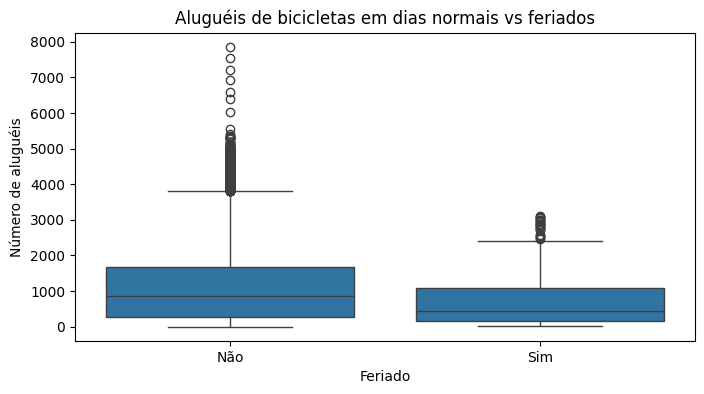

In [70]:
plt.figure(figsize=(8,4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

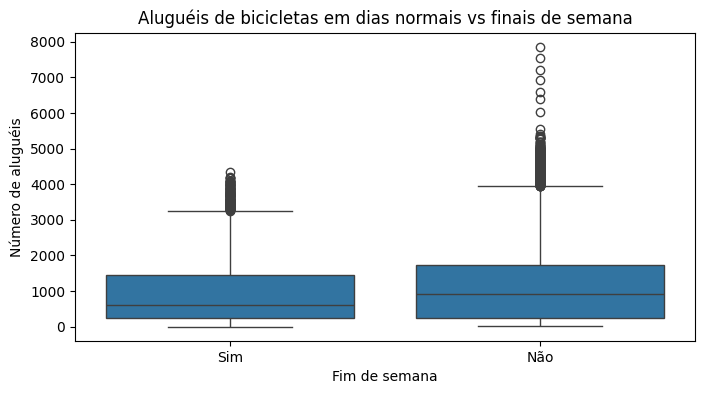

In [71]:
plt.figure(figsize=(8,4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Aluguéis de bicicletas em dias normais vs finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

In [72]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [73]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [74]:
mediana_fim_de_semana

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


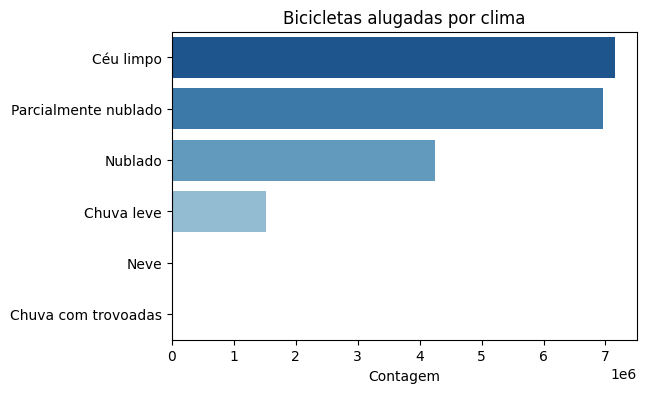

In [75]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Bicicletas alugadas por clima')
plt.xlabel('Contagem')
plt.ylabel('')
plt.show()

In [76]:
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


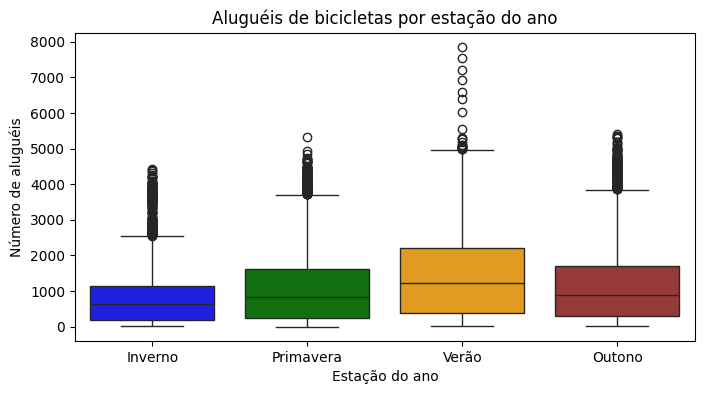

In [77]:
plt.figure(figsize=(8,4))

paleta_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'brown', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_cores)
plt.title('Aluguéis de bicicletas por estação do ano')
plt.xlabel('Estação do ano')
plt.ylabel('Número de aluguéis')
plt.show()


In [78]:
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [79]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')
u_statistic, p_value


(9044682.5, 0.0004762100221646296)

In [80]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17391 non-null  float64
 3   sensacao_termica  17391 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [81]:
df_data = df_limpo.copy()

In [82]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [83]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17391 non-null  float64       
 3   sensacao_termica  17391 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [84]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour

In [85]:
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [86]:
df_data['data_hora'] = df_data['data_hora'].dt.date

df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [87]:
df_data = df_data.rename(columns={'data_hora':'data'})

df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [88]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17391 non-null  float64
 3   sensacao_termica  17391 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [89]:
df_data['data'] = pd.to_datetime(df_data['data'])

In [90]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17391 non-null  float64       
 3   sensacao_termica  17391 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 2.1+ MB


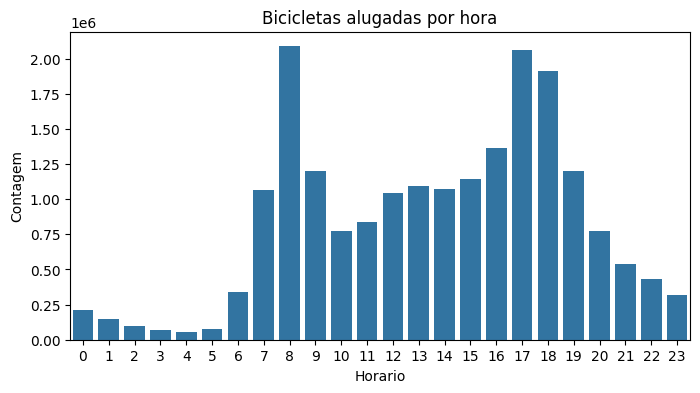

In [91]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=df_por_hora, x='horario', y='contagem')
plt.title('Bicicletas alugadas por hora')
plt.xlabel('Horario')
plt.ylabel('Contagem')

plt.show()

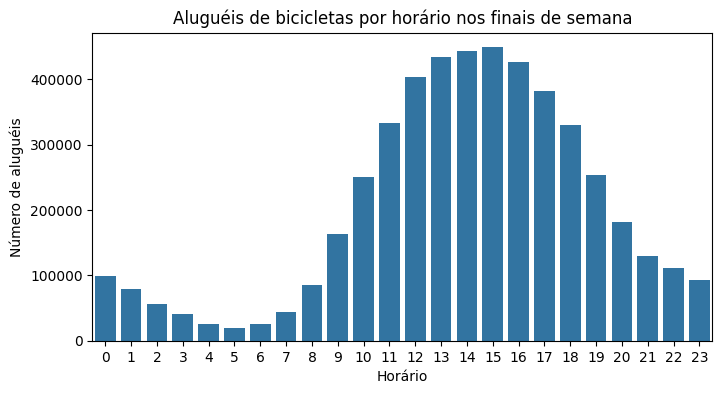

In [92]:
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']

alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=alugueis_fim_de_semana, x='horario', y='contagem')
plt.title('Aluguéis de bicicletas por horário nos finais de semana')
plt.xlabel('Horário')
plt.ylabel('Número de aluguéis')
plt.show()

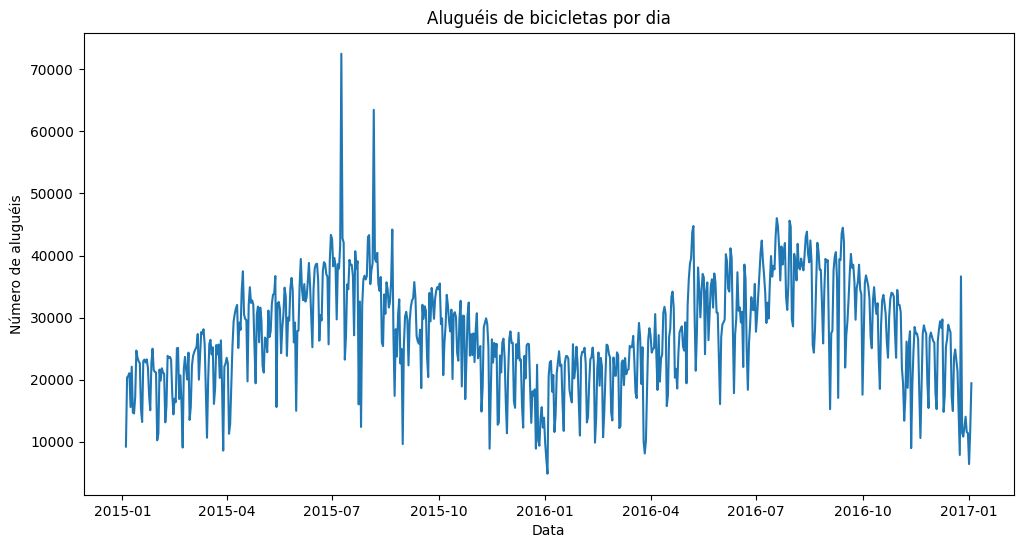

In [94]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo, x='data', y='contagem')
plt.title('Aluguéis de bicicletas por dia')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

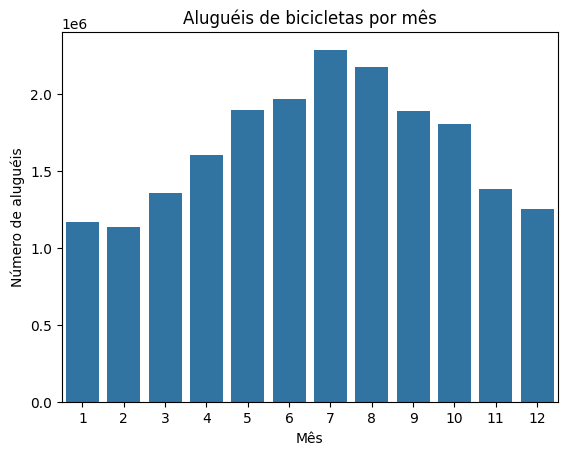

In [95]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

sns.barplot(data=alugueis_mensais, x='mes', y='contagem')
plt.title('Aluguéis de bicicletas por mês')
plt.xlabel('Mês')
plt.ylabel('Número de aluguéis')
plt.show()

In [96]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

In [97]:
df_tempo['mes'] = df_tempo['data'].dt.to_period('M')
df_tempo

,data,contagem,mes
0,2015-01-04,9234,2015-01
1,2015-01-05,20372,2015-01
2,2015-01-06,20613,2015-01
3,2015-01-07,21064,2015-01
4,2015-01-08,15601,2015-01
...,...,...,...
725,2016-12-30,11566,2016-12
726,2016-12-31,11424,2016-12
727,2017-01-01,6421,2017-01
728,2017-01-02,11823,2017-01


In [98]:
media_aluguel_mes = df_tempo.groupby(['mes'])['contagem'].mean().reset_index()
media_aluguel_mes

,mes,contagem
0,2015-01,19522.821429
1,2015-02,19414.071429
2,2015-03,22449.483871
3,2015-04,27719.400000
4,2015-05,28884.290323
5,2015-06,34441.733333
6,2015-07,36151.193548
7,2015-08,33353.258065
8,2015-09,29749.266667
9,2015-10,27904.709677


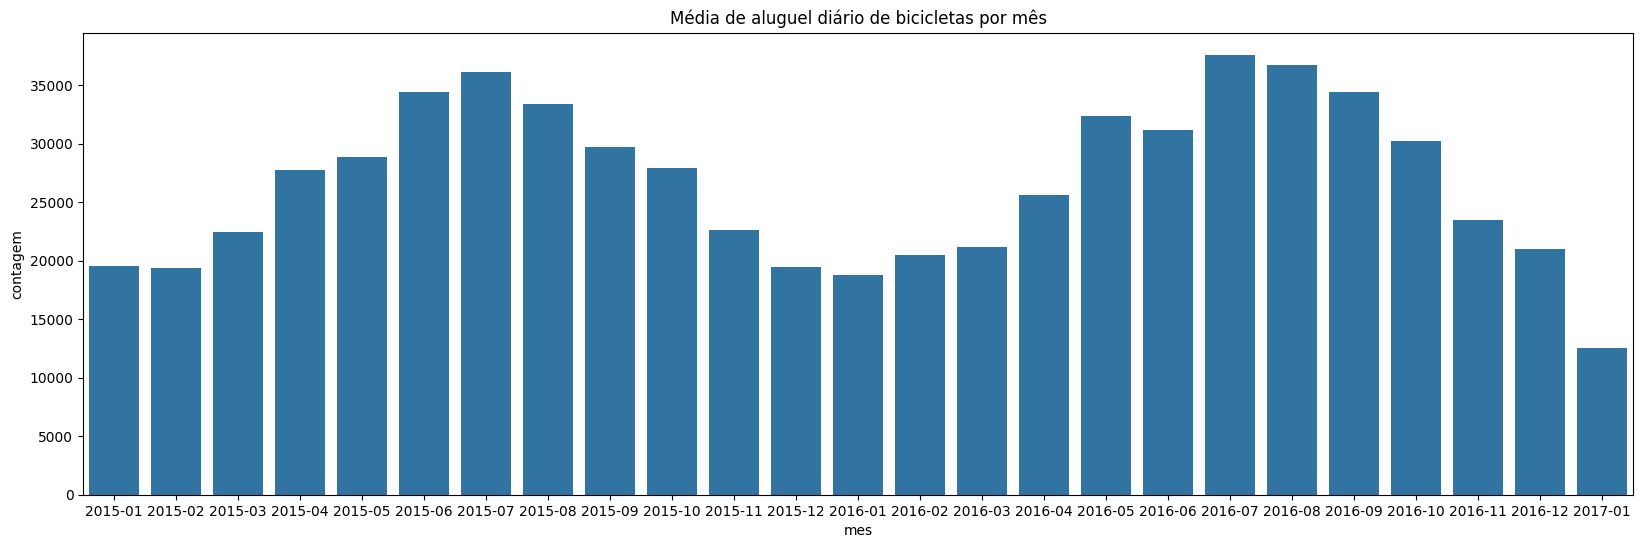

In [99]:
plt.figure(figsize = (20,6))
sns.barplot(x='mes', y='contagem', data=media_aluguel_mes)
plt.title('Média de aluguel diário de bicicletas por mês')
plt.show()